In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [3]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM + 1) * BRANCH_NUM / 2)

In [4]:
training_data.shape

(500, 1000, 100, 1)

In [5]:
training_labels.shape

(500, 5050)

In [6]:
# zero_padding_array.shape

In [7]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

print('train_size: ', train_size)
print('samples_count: ', samples_count)
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

(500, 1000, 100, 1)
(500, 5050)
train_size:  425
samples_count:  500
X_train.shape :  (425, 1000, 100, 1)
X_test.shape :  (75, 1000, 100, 1)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [8]:
model = Sequential()

# Layer 1
model.add(Conv2D(10, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(1, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(Flatten())
model.add(Dense(OUTPUT_DIST_NUM, activation='relu'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 998, 98, 10)       100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 998, 98, 10)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 998, 98, 10)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 499, 49, 10)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 497, 47, 5)        455       
_________________________________________________________________
batch_normalization_2 (Batch (None, 497, 47, 5)        20        
_________________________________________________________________
activation_2 (Activation)    (None, 497, 47, 5)       

In [10]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [11]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=6, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/6
425/425 [==============================] - 12s 28ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 2/6
425/425 [==============================] - 11s 27ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 3/6
425/425 [==============================] - 11s 27ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 4/6
425/425 [==============================] - 11s 27ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 5/6
425/425 [==============================] - 11s 27ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 6/6
425/425 [==============================] - 11s 27ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00


In [12]:
training_result = model.evaluate(X_train, Y_train)
testing_result = model.evaluate(X_test, Y_test)

75/75 [==============================] - 1s 8ms/step


In [13]:
print('Training Acc: ', training_result[1])
print('Testing Acc: ', testing_result[1])

Training Acc:  0.0
Testing Acc:  0.0


## X_train plot

In [14]:
X_train_results = model.predict(X_train)

In [15]:
train_show_index = 4

In [16]:
Y_train

array([[0.        , 0.0529157 , 0.0438037 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0357741 , 0.0281473 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0235462 , 0.0274729 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0700222 , 0.0742145 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00248599, 0.00474541, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0478733 , 0.136407  , ..., 0.        , 0.        ,
        0.        ]])

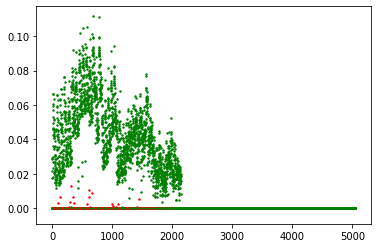

In [17]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)

In [18]:
Y_train[train_show_index]

array([0.       , 0.0178036, 0.0215456, ..., 0.       , 0.       ,
       0.       ])

## X_test plot

In [19]:
X_test_results = model.predict(X_test)

In [20]:
test_show_index = 7

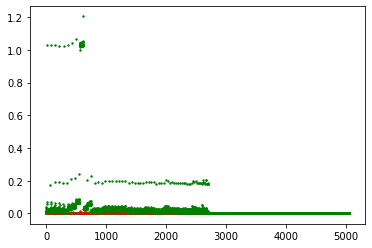

In [26]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)

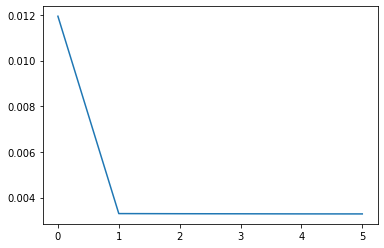

In [22]:
plt.plot(history.history['loss'])
plt.show()